In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swiggy-restaurants-dataset/data.json
/kaggle/input/swiggy-restaurants-dataset/swiggy.csv


In [2]:
df = pd.read_csv("/kaggle/input/swiggy-restaurants-dataset/swiggy.csv")

In [3]:
df.shape

(148541, 11)

In [4]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

In [5]:
df.sample(5) 

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
58422,579206,THE FOOD BAR,"Indirapuram,Delhi",--,Too Few Ratings,₹ 800,"North Indian,Biryani",license,https://www.swiggy.com/restaurants/the-food-ba...,"THE FOOD BAR, Tower A, Ground Floor, Gardenia ...",Menu/579206.json
51394,306652,FIO Cookhouse & Bar,"Greater Kailash 2,Delhi",--,Too Few Ratings,₹ 1000,"North Indian,European",13319010000763,https://www.swiggy.com/restaurants/fio-cookhou...,"FIO Cookhouse & Bar, Epicuria Mall, R1, Nehru ...",Menu/306652.json
131559,263939,The Brooklyn Creamery - Healthy Ice Cream,"Shivaji Nagar,Pune",4.6,50+ ratings,₹ 200,"Desserts,Ice Cream",11518034001573,https://www.swiggy.com/restaurants/the-brookly...,"The Brooklyn Creamery - Healthy Ice Cream, Kin...",Menu/263939.json
6972,260350,Kabir Restaurant,Anand,4.1,100+ ratings,₹ 250,"North Indian,Chinese",10718004000511,https://www.swiggy.com/restaurants/kabir-resta...,"Kabir Restaurant, Mota Bazaar, Vallabh Vidyana...",Menu/260350.json
138378,342874,24x7 Cake Delivery,Sirsa,--,Too Few Ratings,₹ 300,Bakery,license,https://www.swiggy.com/restaurants/24x7-cake-d...,"24x7 Cake Delivery, S 27/9H Dlf phase 3 Gurug...",Menu/342874.json


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [7]:
df.head(3) 

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json


# Data Cleaning

## 1. Missing Value Handling

In [8]:
#Checking number of null values in each column
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [9]:
#Checking the percentage of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2) 

id              0.00
name            0.06
city            0.00
rating          0.06
rating_count    0.06
cost            0.09
cuisine         0.07
lic_no          0.15
link            0.00
address         0.06
menu            0.00
dtype: float64

In [10]:
# 0.6 or 0.9 are very minute, so we remove them  
df.dropna(subset=['name','rating','rating_count','cost','cuisine','address'],how='any')  

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [11]:
#Filling the null values in the lic_no with Mode based on each licence number
m=df['lic_no'].mode()
df.fillna(m)   

#Filtering the null rows from null valued columns
df = df[-df["name"].isnull()]
df = df[-df["rating"].isnull()]
df = df[-df["rating_count"].isnull()]
df = df[-df["cost"].isnull()]
df = df[-df["cuisine"].isnull()]
df = df[-df["address"].isnull()]
df = df[-df["lic_no"].isnull()]

round(100*(df.isnull().sum()/len(df.index)), 2) 

id              0.0
name            0.0
city            0.0
rating          0.0
rating_count    0.0
cost            0.0
cuisine         0.0
lic_no          0.0
link            0.0
address         0.0
menu            0.0
dtype: float64

#### Now the data is cleanes without any missing values

In [12]:
#Calculating the data loss
100-round(100*len(df.index)/148541,2) 

0.18999999999999773

#### We lost 0.1% data in the data cleaning process

## 2. Check for duplicated column

In [13]:
df.duplicated().sum() 

0

#### there is no duplicated column in the data set 

## 3. Check for appropriate datatype

In [14]:
# # for rating column 
# replace '--' with 0 and typecasted to float 

def fun(column):
    rating_int = []
    for i in column:
        if i=='--':
            rating_int.append(0)
        else:
            rating_int.append(float(i)) 
    return rating_int 

df['rating'] = fun(df['rating'])
df['rating'].replace(0.0,round(df['rating'].mean(),2), inplace=True)   

In [15]:
df['rating_count'].value_counts() 

Too Few Ratings    86912
20+ ratings        21604
100+ ratings       20514
50+ ratings        11985
500+ ratings        4390
1K+ ratings         2737
5K+ ratings           98
10K+ ratings          15
Name: rating_count, dtype: int64

In [16]:
# for rating counts 
# convert Too Few Ratings to 1 and whole typecasted to float 

def fun(n):
    try:
        num = n.split(" ")[0]
        if num.split('+')[0].isdigit():
            return float(num.split('+')[0]) 
        else:
            return 1 
    except:
        return n 

df['rating_count']=df['rating_count'].apply(fun)  

In [17]:
# for cost column 
# just remove the ₹ sign and convert to float 

def fun(a):
    try:
        return float(a.split('₹')[1]) 
    except:
        return 0 

df['cost'] = df['cost'].apply(fun)    

#### Data Cleaning is completed now

# Exploratory data Analysis 

In [18]:
# Mathematical summary 
df.describe() 

,id,rating,rating_count,cost
count,148255.000000,148255.000000,148255.000000,148255.000000
mean,363737.807649,2.555256,36.204459,287.604931
std,167787.159149,1.163415,87.958896,797.125421
min,211.000000,1.000000,1.000000,1.000000
25%,234022.500000,1.610000,1.000000,200.000000
50%,412935.000000,1.610000,1.000000,250.000000
75%,502339.500000,3.800000,20.000000,300.000000
max,581031.000000,5.000000,500.000000,300350.000000


In [19]:
# 1. Restaurant with Maximum Rating in Abohar
df1 = df[df['city']=='Abohar']
max_rating_in_city = df1.groupby('name')['rating'].max().sort_values(ascending=False).head(5) 
max_rating_in_city 

name
FOODY MOOD                  4.7
Bharawan Da Dhaba           4.4
Janta Sweet House           4.4
Domino's Pizza              4.4
Hinglaj Kachori Bhandhar    4.2
Name: rating, dtype: float64

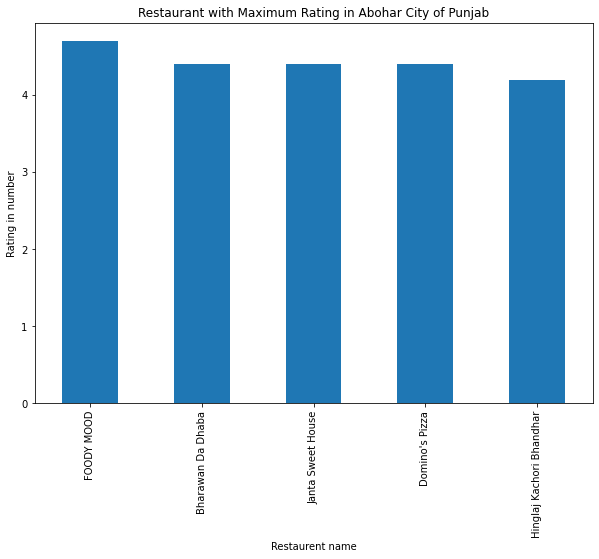

In [20]:
plt.figure(figsize=(10, 7))
max_rating_in_city.plot.bar()
plt.ylabel("Rating in number")
plt.xlabel("Restaurent name")
plt.title("Restaurant with Maximum Rating in Abohar City of Punjab") 
plt.show()

In [21]:
# 2. Number of cities (including subregions) where swiggy is having their restaurants listed? 
len(df.groupby('city'))  

821

In [22]:
# 3. Number of cities (don't include subregions) where swiggy is having their restaurants listed? 
df['city'].apply(lambda x: x.split(",")[-1]).nunique() 

552

In [23]:
# 4. The city with the maximum number of restaurants listed on Swiggy? 
df.groupby('city').size().sort_values(ascending=False).reset_index().iloc[0,0]    

'Bikaner'

In [24]:
# 5. Restaurant chain with maximum number of branches? 
df['name'].value_counts().sort_values(ascending=False).index[0] 

"Domino's Pizza"

In [25]:
# 6. Top 10 cities as per the number of restaurants listed?  
top_10_cities = df.groupby('city')['name'].count().sort_values(ascending=False).head(10)
top_10_cities 

city
Bikaner                      1665
Noida-1                      1424
Indirapuram,Delhi            1279
BTM,Bangalore                1159
Rohini,Delhi                 1135
Kothrud,Pune                 1086
Indiranagar,Bangalore        1079
Electronic City,Bangalore    1039
Greater Kailash 2,Delhi      1037
Vashi,Mumbai                 1021
Name: name, dtype: int64

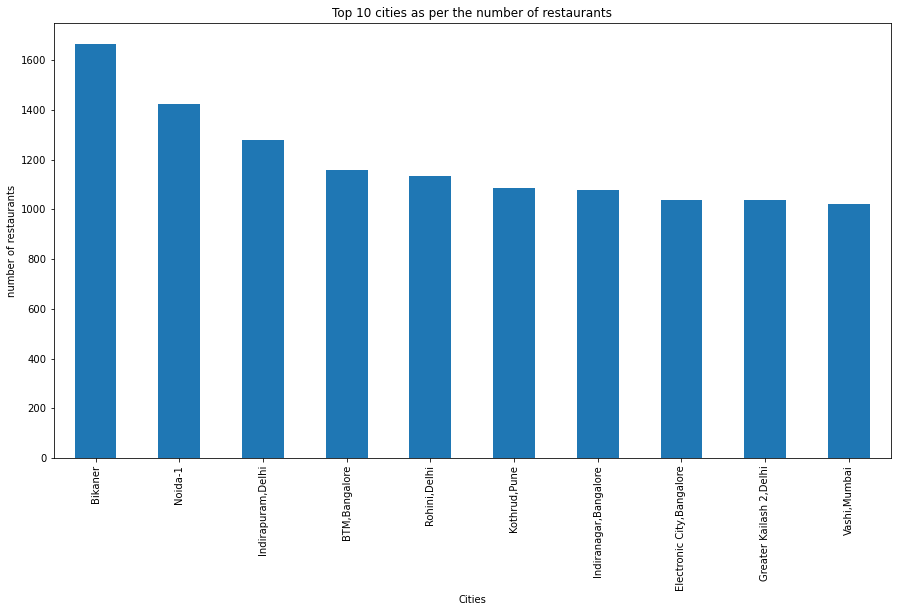

In [26]:
plt.figure(figsize=(15, 8))
top_10_cities.plot.bar()
plt.ylabel("number of restaurants")
plt.xlabel("Cities")
plt.title("Top 10 cities as per the number of restaurants") 
plt.show() 

In [27]:
# 7. Most Popular Cuisines served throughout the dataset? 
a = []
for i in df['cuisine'].values:
    try:
        for j in i.split(','):
            a.append(j)
            
    except:
        a.append(i) 
        
pd.DataFrame({"all_cuisine":a}).value_counts().head(1).index[0]  

('Chinese',)

In [28]:
# 8. Which city is having the least expensive restaurant in terms of cost?
df.groupby('city')['cost'].mean().sort_values().index[0]  

'Hampi'

In [29]:
# 9. Top 5 most popular restaurant chains in India? 
Top_5_most_popular_restaurant_chains = df.groupby('name')['rating'].mean().sort_values(ascending=False).head(5)  
Top_5_most_popular_restaurant_chains 

name
DESI REPUBLIC              5.0
Just Dig In                5.0
Kurries & krolls           5.0
SHREE SAMARTHA CHAPATIS    5.0
OLIVE PIZZERIA             5.0
Name: rating, dtype: float64

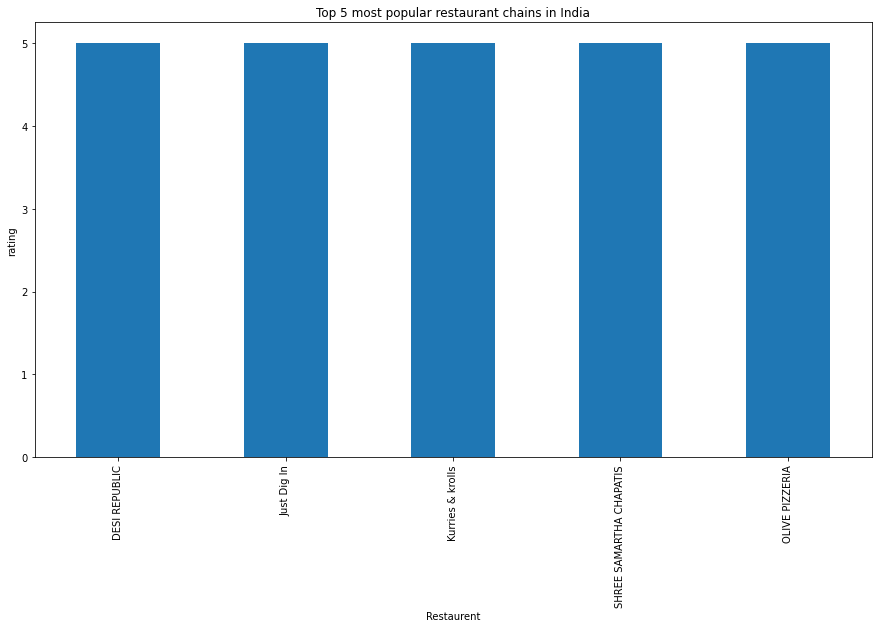

In [30]:
plt.figure(figsize=(15, 8))
Top_5_most_popular_restaurant_chains.plot.bar()
plt.ylabel("rating")
plt.xlabel("Restaurent")
plt.title("Top 5 most popular restaurant chains in India") 
plt.show() 

In [31]:
df2 = df[df['city'].str.contains('Bangalore')]

In [32]:
# 10. Which restaurant in Banglore has the most number of people visited(take a number of reviews for reference)? 

df2 = df[df['city'].str.contains('Bangalore')]
df2.groupby('name')['rating_count'].sum().sort_values(ascending=False).index[0] 

"Domino's Pizza"